In [3]:
#Installing PRAW: A Guide to Accessing Reddit's API
!pip install praw


In [4]:
#Reddit API Authentication

In [ ]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="daHP9WVrhYw8D16nmuikUA",
    client_secret="Hs8nBAwefoQYNOiMH8RJzxShxNT70A",
    user_agent=user_agent
)

In [ ]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

In [ ]:
#New rising topics on selected word

In [ ]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("snoovatars").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Share and swap avatar looks with the Reddit Community!
oh2v6o
advocado20
1625859170.0
351
0.64
https://www.reddit.com/r/snoovatars/comments/oh2v6o/share_and_swap_avatar_looks_with_the_reddit/
0


In [ ]:
#Selecting headlines of subreddits on selected topic

In [ ]:
headlines = set()
for submission in reddit.subreddit("snoovatars").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

957


In [ ]:
#Creating dataset

In [ ]:
#Create a dataframe from the scrapped data 
snoovatars_df = pd.DataFrame(headlines)
snoovatars_df.head()

,0
0,Old snoo base or new snoo base?
1,My Snoo has looked like this for a good while
2,Classic Snoovatar
3,"i just want to testify that i never wanted a ""..."
4,Tried my best at Dark Pit. How'd I do?


In [ ]:
snoovatars_df.columns

RangeIndex(start=0, stop=1, step=1)

In [ ]:
snoovatars_df.columns = ['Titles']

In [ ]:
snoovatars_df.head()

,Titles
0,Old snoo base or new snoo base?
1,My Snoo has looked like this for a good while
2,Classic Snoovatar
3,"i just want to testify that i never wanted a ""..."
4,Tried my best at Dark Pit. How'd I do?


In [ ]:
snoovatars_df.Titles.duplicated().sum() 

0

In [ ]:
#Cleaning headlines

In [ ]:
#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
snoovatars_df["Titles"]= snoovatars_df["Titles"].apply(cleanTxt)

#Show the clean text
snoovatars_df.head()

,Titles
0,Old snoo base or new snoo base?
1,My Snoo has looked like this for a good while
2,Classic Snoovatar
3,"i just want to testify that i never wanted a ""..."
4,Tried my best at Dark Pit. How'd I do?


In [ ]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
snoovatars_df["Titles"]= snoovatars_df["Titles"].apply(remove_emoji)

#Show the clean text
snoovatars_df.head()

,Titles
0,Old snoo base or new snoo base?
1,My Snoo has looked like this for a good while
2,Classic Snoovatar
3,"i just want to testify that i never wanted a ""..."
4,Tried my best at Dark Pit. How'd I do?


In [ ]:

!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 660.6 kB/s eta 0:00:01
   ----- --------------------------------- 81.9/626.3 kB 919.0 kB/s eta 0:00:01
   ------ ------------------------------- 102.4/626.3 kB 845.5 kB/s eta 0:00:01
   ------------- -------------------------- 204.8/626.3 kB 1.1 MB/s eta 0:00:01
   -------------------- ------------------- 317.4/626.3 kB 1.5 MB/s eta 0:00:01
   ----------------------- ---------------- 368.6/626.3 kB 1.4 MB/s eta 0:00:01
   --------------------------- ------------ 430.1/626.3 kB 1.3 MB/s eta 0:00:01
   ------------------------------ --------- 481.3/626.3 kB 1.4 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/626.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------- ----- 542.7/626.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 1.2 MB/s eta 0:00:00


In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#Getting polarity and insight

In [ ]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
snoovatars_df['Subjectivity'] = snoovatars_df['Titles'].apply(getSubjectivity)
snoovatars_df['Polarity'] = snoovatars_df['Titles'].apply(getPolarity)

#Now display data
snoovatars_df.head()

,Titles,Subjectivity,Polarity
0,Old snoo base or new snoo base?,0.663636,-0.340909
1,My Snoo has looked like this for a good while,0.600000,0.700000
2,Classic Snoovatar,0.166667,0.166667
3,"i just want to testify that i never wanted a ""...",0.000000,0.000000
4,Tried my best at Dark Pit. How'd I do?,0.350000,0.425000


In [ ]:
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
snoovatars_df["Insight"] = snoovatars_df["Polarity"].apply(getInsight)

snoovatars_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Old snoo base or new snoo base?,0.663636,-0.340909,Negative
1,My Snoo has looked like this for a good while,0.600000,0.700000,Positive
2,Classic Snoovatar,0.166667,0.166667,Positive
3,"i just want to testify that i never wanted a ""...",0.000000,0.000000,Neutral
4,Tried my best at Dark Pit. How'd I do?,0.350000,0.425000,Positive
5,"Drew u/Odensramn’s snoovatar, thought this wou...",0.300000,1.000000,Positive
6,I'm working on a Munchkin Snoo pack set,0.000000,0.000000,Neutral
7,"Weee my card is good looking, what about you g...",0.600000,0.700000,Positive
8,this is the pissed snoo,0.000000,0.000000,Neutral
9,cat,0.000000,0.000000,Neutral


In [ ]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Getting polarity and insight

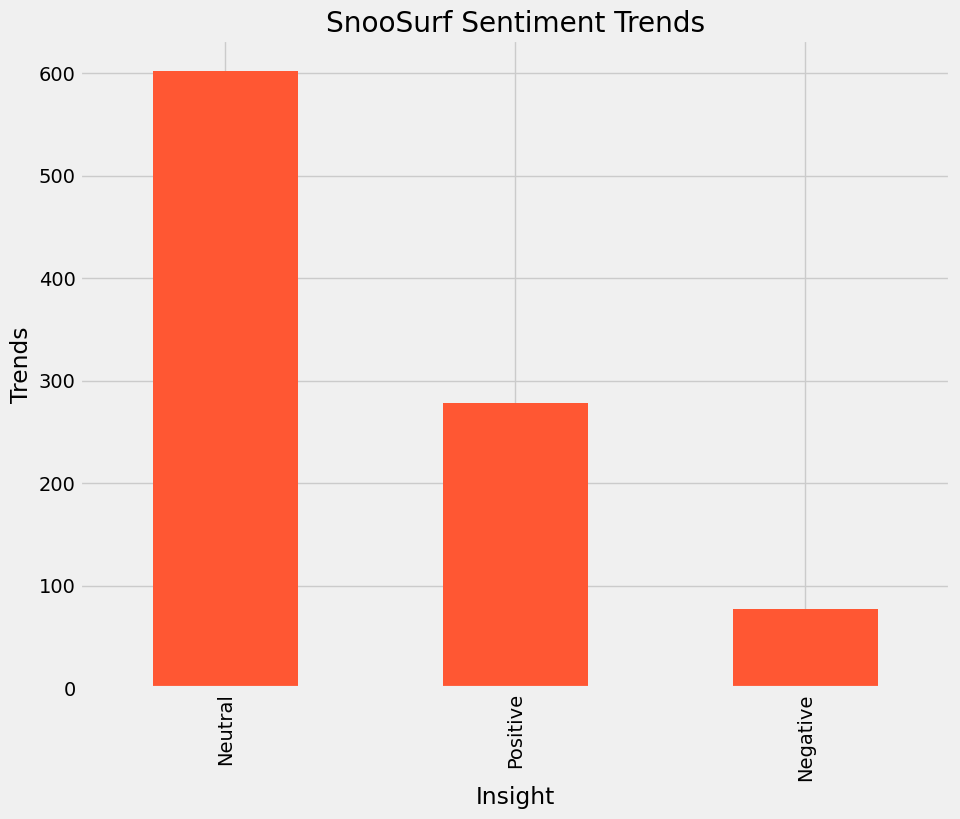

In [ ]:
#Plot the values count of sentiment
# Plot the values count of sentiment
plt.title("SnooSurf Sentiment Trends")
plt.xlabel("Sentiment")
plt.ylabel("Trends")
plt.rcParams["figure.figsize"] = (10,8)
snoovatars_df["Insight"].value_counts().plot(kind="bar", color="#FF5733")
plt.show()


In [ ]:
#Creating WordCloud

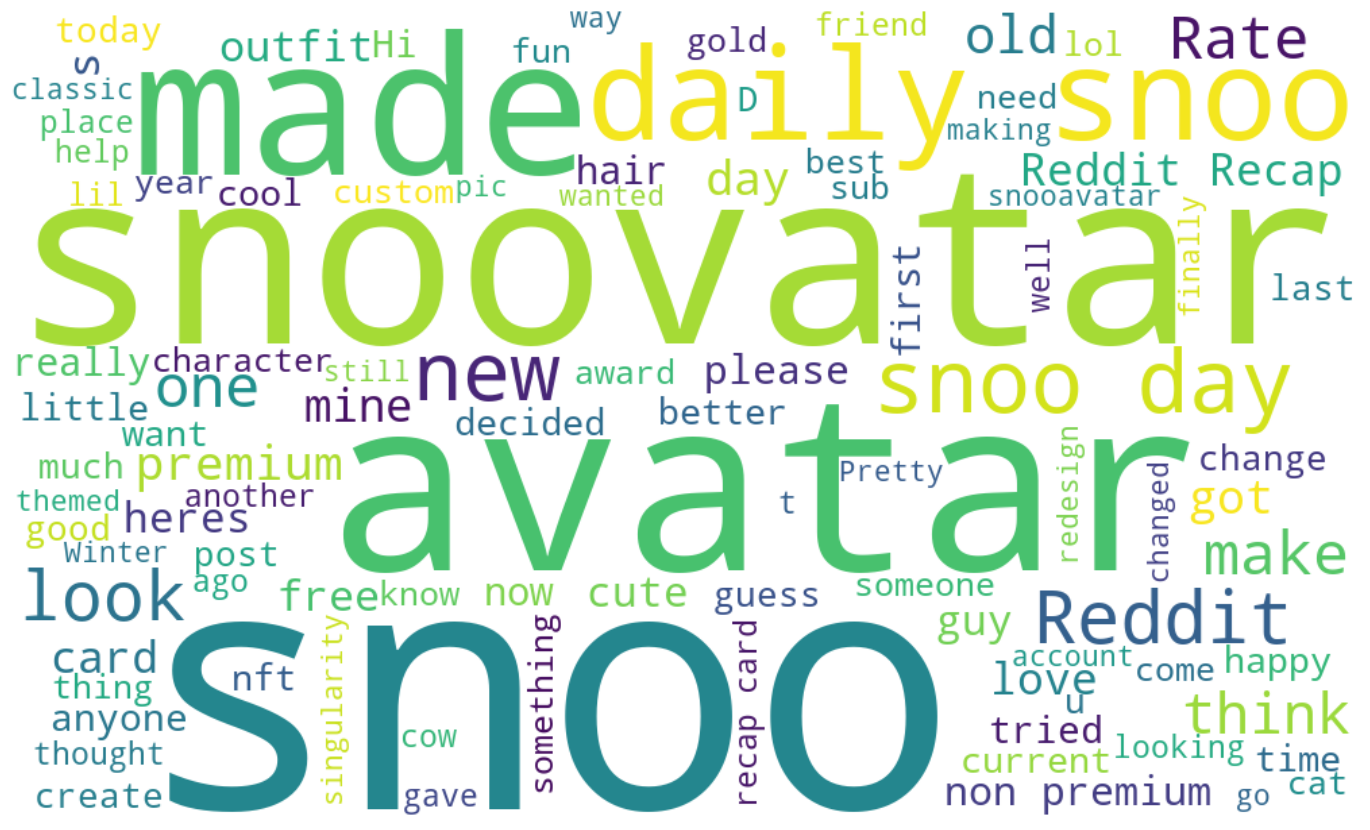

In [ ]:
# Concatenate all titles into a single string
text = ' '.join([title for title in snoovatars_df['Titles']])

# Generate word cloud
wordcloud = WordCloud(width=1000, height=600,
                      max_words=100,
                      stopwords=STOPWORDS,
                      background_color="white").generate(text)

# Display the generated image
plt.figure(figsize=(20,10), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
